In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
child_table_path = 'Data/child_table_cleaned.parquet'

child_table = pd.read_parquet(child_table_path)

In [7]:
child_table['all_vaccines'].value_counts(normalize=True)*100

all_vaccines
True     66.33706
False    33.66294
Name: proportion, dtype: float64

In [14]:
# Group by district_id and calculate the proportion of children with all vaccines
district_coverage = (
    child_table.groupby('district_id')['all_vaccines']
    .mean().mul(100)
    .reset_index()
    .rename(columns={'all_vaccines': 'vaccine_coverage'})
)

# Sort by coverage for better readability
district_coverage = district_coverage.sort_values(by='vaccine_coverage', ascending=False)

# Display the results
display(district_coverage)


,district_id,vaccine_coverage
9,district_29c2,97.479906
14,district_3b68,96.765035
46,district_cc86,94.986420
53,district_dc94,89.169864
39,district_a8f6,83.596986
52,district_d7e0,83.561262
47,district_cc96,83.053898
23,district_6922,82.972969
8,district_297a,82.324977
21,district_5667,82.305361


In [38]:
len(district_coverage)

59

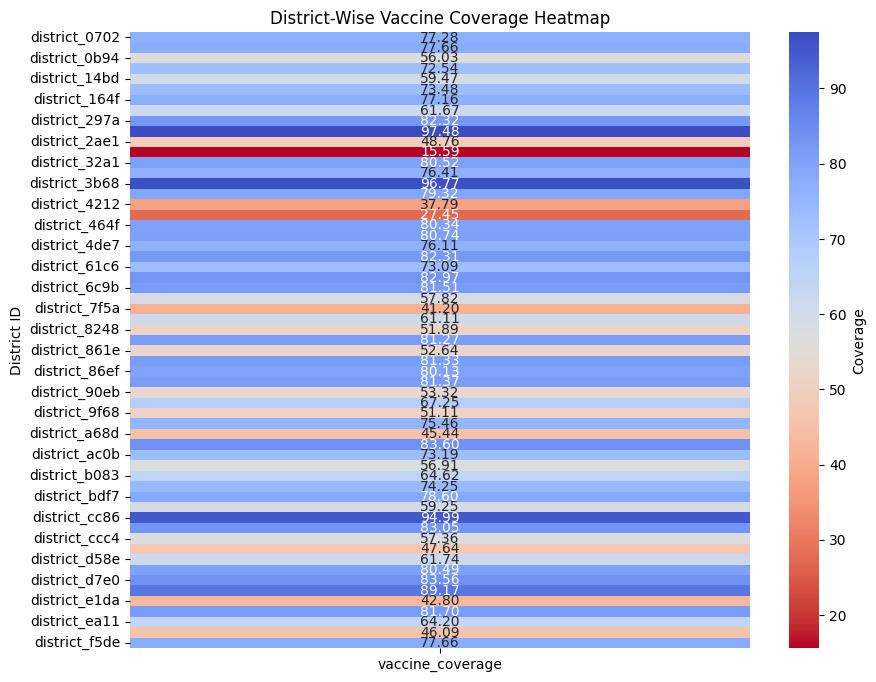

In [39]:
import seaborn as sns

# Create a pivot table
heatmap_data = district_coverage.pivot_table(index='district_id', values='vaccine_coverage')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="coolwarm_r", annot=True, fmt=".2f", cbar_kws={'label': 'Coverage'})
plt.title("District-Wise Vaccine Coverage Heatmap")
plt.ylabel("District ID")
plt.show()

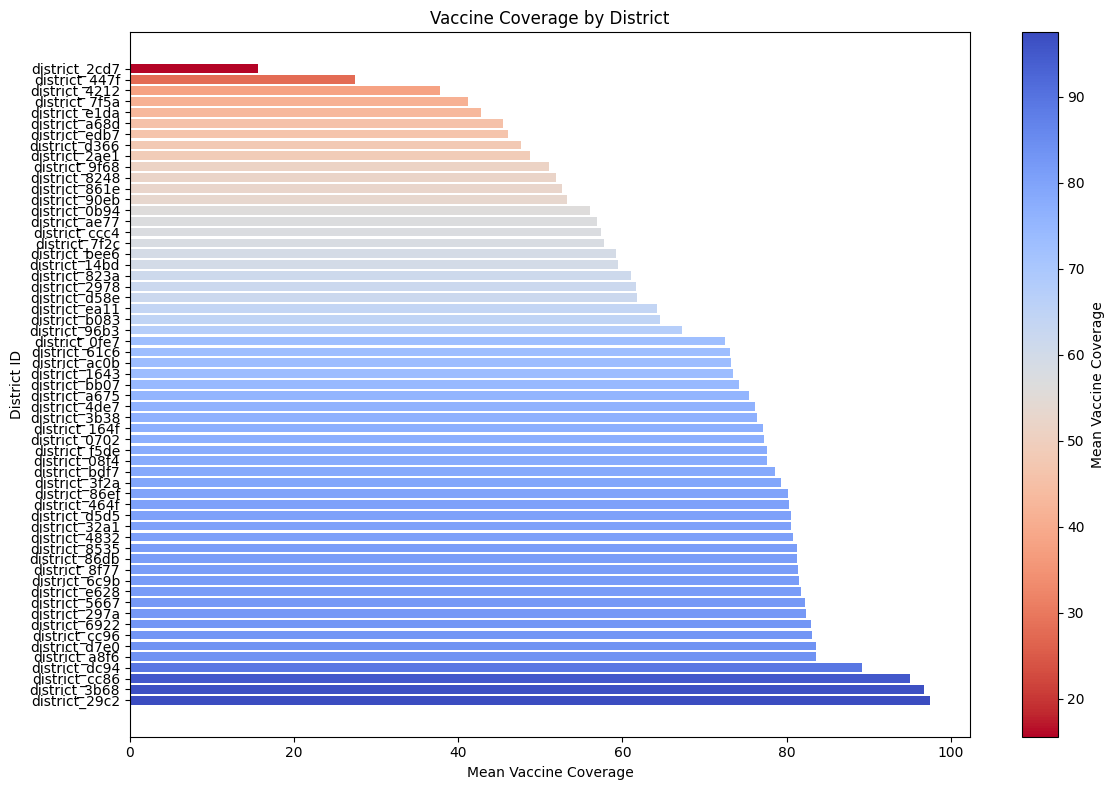

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the districts by vaccine coverage for better visualization
district_coverage = district_coverage.sort_values(by='vaccine_coverage', ascending=False)

# Extract data for plotting
districts = district_coverage['district_id']
coverage = district_coverage['vaccine_coverage']

# Normalize coverage values to [0, 1] for colormap
norm = plt.Normalize(vmin=coverage.min(), vmax=coverage.max())

# Choose a colormap (e.g., 'coolwarm', 'viridis', 'plasma')
colormap = plt.cm.coolwarm_r

# Map coverage values to colors
colors = colormap(norm(coverage))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(districts, coverage, color=colors)

# Add colorbar to show the mapping of colors to coverage values
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Empty array since it's not used for image display
cbar = plt.colorbar(sm, ax=ax)  # Explicitly pass the axis `ax`
cbar.set_label('Mean Vaccine Coverage')

# Customize plot
ax.set_xlabel("Mean Vaccine Coverage")
ax.set_ylabel("District ID")
ax.set_title("Vaccine Coverage by District")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


In [13]:
# Group by district_id and calculate the proportion of children with all vaccines
region_coverage = (
    child_table.groupby('region_id')['all_vaccines']
    .mean().mul(100)
    .reset_index()
    .rename(columns={'all_vaccines': 'vaccine_coverage'})
)

# Sort by coverage for better readability
region_coverage = region_coverage.sort_values(by='vaccine_coverage', ascending=False)

# Display the results
display(region_coverage)


,region_id,vaccine_coverage
2,region_5ae5,92.837302
9,region_df42,81.618953
0,region_086d,80.119741
4,region_7dcc,79.898330
5,region_b52b,75.640706
8,region_c3a2,72.763291
10,region_fa25,64.615338
3,region_77e8,58.436201
7,region_b6cf,55.459517
6,region_b57b,51.333152


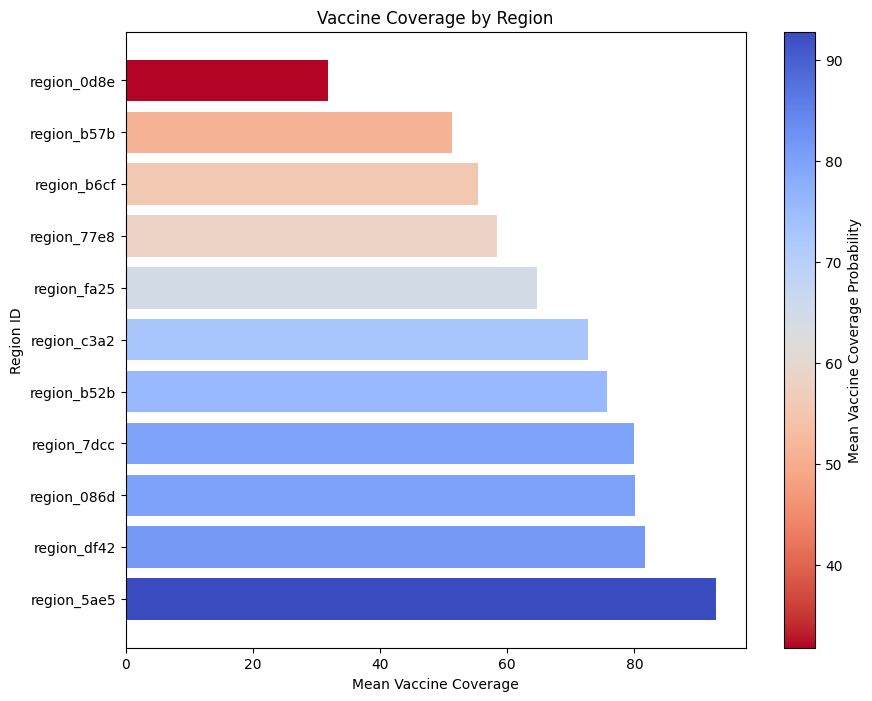

In [32]:
# Plot horizontal bar chart

# Normalize coverage values to [0, 1] for colormap
norm = plt.Normalize(vmin=region_coverage['vaccine_coverage'].min(), vmax=region_coverage['vaccine_coverage'].max())
colormap = plt.cm.coolwarm_r

# Map coverage values to colors
colors = colormap(norm(region_coverage['vaccine_coverage']))

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(region_coverage['region_id'], region_coverage['vaccine_coverage'], color=colors)

# Add colorbar to show the mapping of colors to coverage values
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Empty array since it's not used for image display
cbar = plt.colorbar(sm, ax=ax)  # Explicitly pass the axis `ax`
cbar.set_label('Mean Vaccine Coverage Probability')

plt.xlabel("Mean Vaccine Coverage")
plt.ylabel("Region ID")
plt.title("Vaccine Coverage by Region")
# plt.gca().invert_yaxis()  # Highest coverage on top
plt.show()


In [57]:
child_table['region_id'].value_counts(normalize=True)*100

region_id
region_77e8    13.217271
region_b6cf    12.929561
region_b52b    12.344735
region_b57b    11.251583
region_c3a2    11.083623
region_086d    10.379880
region_7dcc    10.151248
region_df42     7.014580
region_0d8e     6.000779
region_fa25     3.609834
region_5ae5     2.016905
Name: proportion, dtype: float64

In [43]:
# Group by district_id and calculate the proportion of children with all vaccines
phc_coverage = (
    child_table.groupby('phc_id')['all_vaccines']
    .mean().mul(100)
    .reset_index()
    .rename(columns={'all_vaccines': 'vaccine_coverage'})
)

# Sort by coverage for better readability
phc_coverage = phc_coverage.sort_values(by='vaccine_coverage', ascending=False)

# Display the results
display(phc_coverage)


,phc_id,vaccine_coverage
1507,phc_c0cc,100.000000
1335,phc_aac6,100.000000
288,phc_22f7,100.000000
489,phc_3bc6,100.000000
657,phc_5307,100.000000
...,...,...
542,phc_42a7,1.903755
194,phc_18de,1.248266
993,phc_81ac,0.546448
437,phc_35b6,0.418021


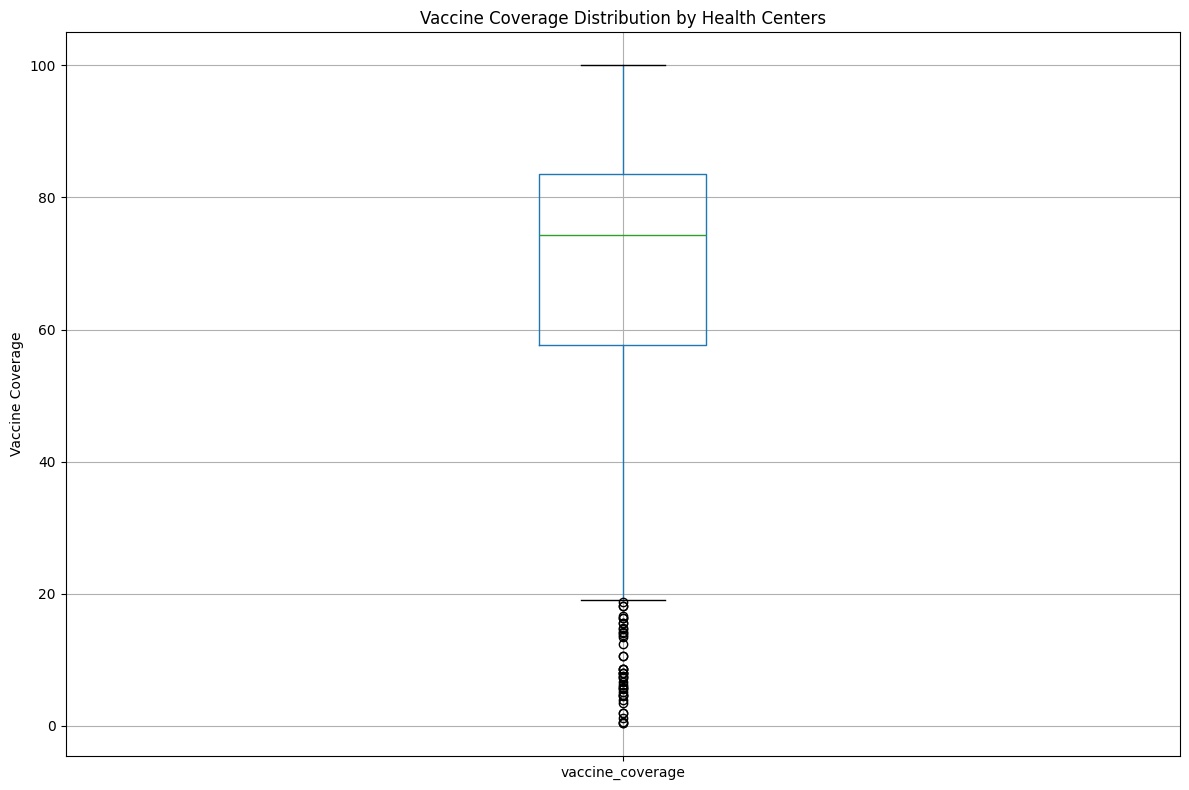

In [53]:
# Assuming your original dataframe is 'df', with columns 'district_id' and 'all_vaccines'
# Create a box plot to visualize the distribution of vaccine coverage by district
plt.figure(figsize=(12, 8))

# Create the boxplot
phc_coverage.boxplot(column=['vaccine_coverage'])
# Customize the plot
plt.title("Vaccine Coverage Distribution by Health Centers")
#plt.xlabel("PHC ID")
plt.ylabel("Vaccine Coverage")
#plt.xticks(rotation=90)  # Rotate district labels if necessary for better readability
plt.tight_layout()  # Adjust layout to avoid clipping

plt.show()


In [58]:
display(phc_coverage.head(10))

,phc_id,vaccine_coverage
1507,phc_c0cc,100.000000
1335,phc_aac6,100.000000
288,phc_22f7,100.000000
489,phc_3bc6,100.000000
657,phc_5307,100.000000
692,phc_57bf,100.000000
716,phc_5af7,100.000000
775,phc_6264,99.942163
532,phc_4188,99.882904
859,phc_6dae,99.804688


In [59]:
display(phc_coverage.tail(10))

,phc_id,vaccine_coverage
1337,phc_aaf7,4.643064
976,phc_7ed0,4.552590
1446,phc_b8a6,3.946839
1392,phc_b127,3.460208
1256,phc_a263,1.937984
542,phc_42a7,1.903755
194,phc_18de,1.248266
993,phc_81ac,0.546448
437,phc_35b6,0.418021
1217,phc_9dad,0.413223


In [63]:
for phc in phc_coverage.tail(10)['phc_id']:
    print(phc)

phc_aaf7
phc_7ed0
phc_b8a6
phc_b127
phc_a263
phc_42a7
phc_18de
phc_81ac
phc_35b6
phc_9dad


In [67]:
for phc in phc_coverage.tail(10)['phc_id']:
    print(len(child_table[child_table['phc_id']==phc])/len(child_table)*100)

0.0416068402321483
0.04614664636310818
0.029979623997801578
0.010468116796654839
0.024920637910375534
0.02283184413203495
0.017410639470330194
0.013257199818600938
0.025995219680735718
0.0029218964991816277


In [68]:
for phc in phc_coverage.head(10)['phc_id']:
    print(len(child_table[child_table['phc_id']==phc])/len(child_table)*100)

0.00417758755668117
0.0035376680754554413
1.207395247595714e-05
0.01341416120078838
0.013281347723552852
0.007027040341007054
0.010443968891702925
0.020875863830929892
0.010311155414467397
0.006181863667690055
